# Master's thesis code

**Sofia Morais - 152021001**

In [62]:
# Load the packages
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from datetime import datetime

## 1. DATA PREPARATION

### 1.1 Creating the new dataset

In [2]:
# Import the original dataset and save it as "original"
original = pd.read_excel('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/data/original/original.xlsx', header=1,index_col=0)

# Data transformation
original.index.name='Timestamp'
original = original.rename(columns={'google': 'Popularity'})
original = original.rename(columns={'n-transactions-per-block': 'Total-circulating-BTC'}) # correct the name of one variable
original = original.rename(columns={'n-transactions-per-block.1': 'n-transactions-per-block'}) # correct the name of one variable
original.drop(original.columns[-21:], axis=1, inplace=True) # Delete the columns that you will not use
original.head() # Check the first observations

,market-price,market-cap,trade-volume,transaction-fees-usd,avg-confirmation-time,difficulty,High,Low,hash-rate,block-size,...,n-transactions-total,Popularity,Open,n-payments-per-block,Total-circulating-BTC,cost-per-transaction-percent,fees-usd-per-transaction,n-unique-addresses,n-transactions-per-block,output-volume
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1013.42,1.651285e+10,4.765228e+06,114872.988609,13.016229,3.176884e+11,1013.42,956.10,2.589950e+06,97293.875547,...,183961799.0,43,963.4,0.0,1808.982832,0.757827,0.288061,468609.6,272924.100000,1.693024e+06
2017-01-02,1013.42,1.651285e+10,4.765228e+06,114872.988609,97.413264,3.176884e+11,1031.70,990.20,2.589950e+06,97293.875547,...,183961799.0,74,995.4,0.0,1808.982832,0.726644,0.288061,468609.6,272924.100000,1.693024e+06
2017-01-03,1013.42,1.651285e+10,4.765228e+06,114872.988609,16.441754,3.176884e+11,1035.50,1006.50,2.589950e+06,97293.875547,...,183961799.0,69,1017.0,0.0,1808.982832,0.718670,0.288061,468609.6,272924.100000,1.693024e+06
2017-01-04,999.65,1.758021e+10,5.857834e+06,114872.988609,37.127815,3.176884e+11,1148.50,999.65,2.542573e+06,97743.656720,...,183961799.0,79,1033.3,0.0,1830.788898,0.668387,0.307901,488315.4,276578.033333,1.797751e+06
2017-01-05,999.65,1.758021e+10,5.857834e+06,121958.044759,17.147923,3.176884e+11,1150.60,874.50,2.147763e+06,97743.656720,...,184884526.0,100,1135.4,0.0,1830.788898,0.705463,0.307901,488315.4,276578.033333,1.797751e+06


In [3]:
# Import the confidence index dataset and save it
confidence = pd.read_csv('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/data/add_new_variables/consumer confidence index.csv',index_col='TIME')

# Data transformation
confidence= confidence[confidence["LOCATION"].str.contains("OECD")==True]
confidence= confidence[confidence["LOCATION"].str.contains("OECDE")==False]
confidence= confidence.drop(['LOCATION','INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'], axis='columns')

# Delete the the rows that you will not use
for i in confidence.index:
    if i>'2021-06':
        confidence=confidence.drop(i)
    continue

# Check the last values to make sure that you the previous code worked
confidence.head()

,Value
TIME,
2017-01,100.5115
2017-02,100.5401
2017-03,100.6480
2017-04,100.7638
2017-05,100.8411


In [4]:
# Create an empty column
original['Confidence']=''

# Add the confidence index variable to the original dataset
for i in original.index.strftime('%Y-%m'):
    for j in confidence.index:
        if i==j:
            original['Confidence'][i]=confidence['Value'][j]
    continue
original['Confidence'].head(32) #check the values between the first 2 months to guarantee that the values were  copied

<ipython-input-4-2a55fca83ce8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Confidence'][i]=confidence['Value'][j]
C:\Users\sofia\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Timestamp
2017-01-01    100.5115
2017-01-02    100.5115
2017-01-03    100.5115
2017-01-04    100.5115
2017-01-05    100.5115
2017-01-06    100.5115
2017-01-07    100.5115
2017-01-08    100.5115
2017-01-09    100.5115
2017-01-10    100.5115
2017-01-11    100.5115
2017-01-12    100.5115
2017-01-13    100.5115
2017-01-14    100.5115
2017-01-15    100.5115
2017-01-16    100.5115
2017-01-17    100.5115
2017-01-18    100.5115
2017-01-19    100.5115
2017-01-20    100.5115
2017-01-21    100.5115
2017-01-22    100.5115
2017-01-23    100.5115
2017-01-24    100.5115
2017-01-25    100.5115
2017-01-26    100.5115
2017-01-27    100.5115
2017-01-28    100.5115
2017-01-29    100.5115
2017-01-30    100.5115
2017-01-31    100.5115
2017-02-01    100.5401
Name: Confidence, dtype: object

In [5]:
# Import the variable gold save it
gold = pd.read_excel('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/data/add_new_variables/gold.xlsx', header=4,index_col=1,sheet_name='Data')

# Create date and time with dataframe
data = pd.date_range('2014-01', periods = 104, freq ='M')

#Add to gold dataframe
gold.index=data

# Transform the data
gold.index=gold.index.strftime('%Y-%m')
gold.index.name='Timestamp'
gold= gold.drop(gold.columns[0], axis=1)
gold= gold.rename(columns={'Unnamed: 2': 'Price'})

# Delete the the rows that you will not use
for i in gold.index:
    if i<'2017-01' or i>'2021-06':
        gold=gold.drop(i)
    continue

gold.head()

,Price
Timestamp,
2017-01,1192.10
2017-02,1234.20
2017-03,1231.42
2017-04,1266.88
2017-05,1246.04


In [6]:
# Create an empty column
original['Gold']=''

# Copy this variable to the original dataframe
for i in original.index.strftime('%Y-%m'):
    for j in gold.index:
        if i==j:
            original['Gold'][i]=gold['Price'][j]
            
        continue
original['Gold'].head(32) #check the values between the first 2 months to guarantee that the values were copied

<ipython-input-6-312bbe7ac82a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Gold'][i]=gold['Price'][j]
C:\Users\sofia\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Timestamp
2017-01-01    1192.1
2017-01-02    1192.1
2017-01-03    1192.1
2017-01-04    1192.1
2017-01-05    1192.1
2017-01-06    1192.1
2017-01-07    1192.1
2017-01-08    1192.1
2017-01-09    1192.1
2017-01-10    1192.1
2017-01-11    1192.1
2017-01-12    1192.1
2017-01-13    1192.1
2017-01-14    1192.1
2017-01-15    1192.1
2017-01-16    1192.1
2017-01-17    1192.1
2017-01-18    1192.1
2017-01-19    1192.1
2017-01-20    1192.1
2017-01-21    1192.1
2017-01-22    1192.1
2017-01-23    1192.1
2017-01-24    1192.1
2017-01-25    1192.1
2017-01-26    1192.1
2017-01-27    1192.1
2017-01-28    1192.1
2017-01-29    1192.1
2017-01-30    1192.1
2017-01-31    1192.1
2017-02-01    1234.2
Name: Gold, dtype: object

In [7]:
# Import the binary variable of bitcoin regulation related news and save it
news_reg = pd.read_excel('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/data/add_new_variables/news_regulation.xlsx', header=0,index_col=0)
news_reg.head()

# Add this variable to the original dataset
original['News Regulation'] = news_reg['news_regulation']
original.head(10) #check the original dataset

,market-price,market-cap,trade-volume,transaction-fees-usd,avg-confirmation-time,difficulty,High,Low,hash-rate,block-size,...,n-payments-per-block,Total-circulating-BTC,cost-per-transaction-percent,fees-usd-per-transaction,n-unique-addresses,n-transactions-per-block,output-volume,Confidence,Gold,News Regulation
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1013.42,1.651285e+10,4.765228e+06,114872.988609,13.016229,3.176884e+11,1013.42,956.10,2.589950e+06,97293.875547,...,0.0,1808.982832,0.757827,0.288061,468609.6,272924.100000,1.693024e+06,100.5115,1192.1,0
2017-01-02,1013.42,1.651285e+10,4.765228e+06,114872.988609,97.413264,3.176884e+11,1031.70,990.20,2.589950e+06,97293.875547,...,0.0,1808.982832,0.726644,0.288061,468609.6,272924.100000,1.693024e+06,100.5115,1192.1,0
2017-01-03,1013.42,1.651285e+10,4.765228e+06,114872.988609,16.441754,3.176884e+11,1035.50,1006.50,2.589950e+06,97293.875547,...,0.0,1808.982832,0.718670,0.288061,468609.6,272924.100000,1.693024e+06,100.5115,1192.1,0
2017-01-04,999.65,1.758021e+10,5.857834e+06,114872.988609,37.127815,3.176884e+11,1148.50,999.65,2.542573e+06,97743.656720,...,0.0,1830.788898,0.668387,0.307901,488315.4,276578.033333,1.797751e+06,100.5115,1192.1,0
2017-01-05,999.65,1.758021e+10,5.857834e+06,121958.044759,17.147923,3.176884e+11,1150.60,874.50,2.147763e+06,97743.656720,...,0.0,1830.788898,0.705463,0.307901,488315.4,276578.033333,1.797751e+06,100.5115,1192.1,0
2017-01-06,999.65,1.758021e+10,5.857834e+06,121958.044759,251.417225,3.176884e+11,1027.40,852.50,2.897298e+06,97743.656720,...,0.0,1830.788898,0.695898,0.307901,488315.4,276578.033333,1.797751e+06,100.5115,1192.1,0
2017-01-07,910.49,1.494351e+10,5.857834e+06,121958.044759,34.255985,3.176884e+11,910.49,806.70,2.796814e+06,98176.161409,...,0.0,1848.716302,0.736739,0.317517,512669.8,276702.666667,1.878899e+06,100.5115,1192.1,0
2017-01-08,910.49,1.494351e+10,5.857834e+06,83380.703646,24.342649,3.176884e+11,936.10,875.80,2.528855e+06,98176.161409,...,0.0,1848.716302,0.749817,0.317517,512669.8,276702.666667,1.878899e+06,100.5115,1192.1,0
2017-01-09,910.49,1.494351e+10,5.857834e+06,83380.703646,20.581883,3.368999e+11,910.50,870.90,3.031277e+06,98176.161409,...,0.0,1848.716302,0.775388,0.317517,512669.8,276702.666667,1.878899e+06,100.5115,1192.1,0


In [8]:
## Sentiment analysis using Google Trends (GT)
# Import the variables
GT = pd.read_csv('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/data/add_new_variables/GT.csv', header=1,index_col=0)

# Data transformation
GT = GT.rename(columns={'bitcoin legal: (Worldwide)': 'legal'})
GT = GT.rename(columns={'bitcoin cryptocurrency: (Worldwide)': 'cryptocurrency'})
GT = GT.rename(columns={'bitcoin scam: (Worldwide)': 'scam'})

# Delete the the rows that you will not use
for i in GT.index:
    if i>'2021-06-13':
        GT=GT.drop(i)
    continue
GT.head(300)

,legal,cryptocurrency,scam
Week,,,
2017-01-01,1,2,1
2017-01-08,1,2,1
2017-01-15,1,1,1
2017-01-22,1,1,1
2017-01-29,1,1,1
...,...,...,...
2021-05-16,5,60,4
2021-05-23,3,37,4
2021-05-30,4,26,3


In [9]:
# Add the Bitcoin+legal keyword variable to the original dataset
original['GT_legal']=''
for i in original.index.strftime('%Y-%m-%d'):
    for j in range(len(GT.index)-1):
        if i>=GT.index[j] and i<GT.index[j+1]:
            original['GT_legal'][i] =GT['legal'][GT.index[j]]
        continue
        
original['GT_legal'].head() #check the original dataset

<ipython-input-9-2af8b1b10c0f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['GT_legal'][i] =GT['legal'][GT.index[j]]
C:\Users\sofia\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Timestamp
2017-01-01    1
2017-01-02    1
2017-01-03    1
2017-01-04    1
2017-01-05    1
Name: GT_legal, dtype: object

In [10]:
#Convert string <1 in legal variable to a float
for j in range(len(original['GT_legal'])):
    if original['GT_legal'][j]=='<1':
        original['GT_legal'][j]=0.5
    continue

<ipython-input-10-4aa6f749fe6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['GT_legal'][j]=0.5


In [11]:
# Add the Bitcoin+cryptocurrency keyword variable to the original dataset
original['GT_cryptocurrency']=''
for i in original.index.strftime('%Y-%m-%d'):
    for j in range(len(GT.index)-1):
        if i>=GT.index[j] and i<GT.index[j+1]:
            original['GT_cryptocurrency'][i] =GT['cryptocurrency'][GT.index[j]]
        continue
original['GT_cryptocurrency'].head() #check the original dataset

<ipython-input-11-38b62c94f828>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['GT_cryptocurrency'][i] =GT['cryptocurrency'][GT.index[j]]


Timestamp
2017-01-01    2
2017-01-02    2
2017-01-03    2
2017-01-04    2
2017-01-05    2
Name: GT_cryptocurrency, dtype: object

In [12]:
original['GT_scam']=''

# Add the Bitcoin+scam keyword variable to the original dataset
original['GT_scam']=''
for i in original.index.strftime('%Y-%m-%d'):
    for j in range(len(GT.index)-1):
        if i>=GT.index[j] and i<GT.index[j+1]:
            original['GT_scam'][i] =GT['scam'][GT.index[j]]
        continue

original['GT_scam'].head() #check the original dataset

<ipython-input-12-c829eaf86936>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['GT_scam'][i] =GT['scam'][GT.index[j]]


Timestamp
2017-01-01    1
2017-01-02    1
2017-01-03    1
2017-01-04    1
2017-01-05    1
Name: GT_scam, dtype: object

In [13]:
## S&P500 index
# Import the variable
SP500 = pd.read_csv('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/data/add_new_variables/SP500.csv', header=0,index_col=0)
SP500 = SP500.rename(columns={'s1': 'Value'})
SP500= SP500.drop(['conf','status1'], axis='columns')
SP500.index = pd.to_datetime(SP500.index)
SP500.index=SP500.index.strftime('%Y-%m')
SP500.head()

,Value
date,
2017-01,2275.1160
2017-02,2329.9105
2017-03,2366.8222
2017-04,2359.3095
2017-05,2395.3459


In [14]:
original['SP500']=''
# Copy this variable to the original dataframe
for i in original.index.strftime('%Y-%m'):
    for j in SP500.index:
        if i==j:
            original['SP500'][i]=SP500['Value'][j]
            
        continue
original['SP500'].head(32) #check the values between the first 2 months to guarantee that the values were copied

<ipython-input-14-d47781a0b7d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['SP500'][i]=SP500['Value'][j]
C:\Users\sofia\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Timestamp
2017-01-01     2275.116
2017-01-02     2275.116
2017-01-03     2275.116
2017-01-04     2275.116
2017-01-05     2275.116
2017-01-06     2275.116
2017-01-07     2275.116
2017-01-08     2275.116
2017-01-09     2275.116
2017-01-10     2275.116
2017-01-11     2275.116
2017-01-12     2275.116
2017-01-13     2275.116
2017-01-14     2275.116
2017-01-15     2275.116
2017-01-16     2275.116
2017-01-17     2275.116
2017-01-18     2275.116
2017-01-19     2275.116
2017-01-20     2275.116
2017-01-21     2275.116
2017-01-22     2275.116
2017-01-23     2275.116
2017-01-24     2275.116
2017-01-25     2275.116
2017-01-26     2275.116
2017-01-27     2275.116
2017-01-28     2275.116
2017-01-29     2275.116
2017-01-30     2275.116
2017-01-31     2275.116
2017-02-01    2329.9105
Name: SP500, dtype: object

In [15]:
# Import the variable
oil = pd.read_excel('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/data/add_new_variables/oil price.xlsx', sheet_name='Data',header=4,index_col=1)
oil=oil.drop(['Unnamed: 0'],axis='columns')
oil = oil.rename(columns={'Unnamed: 2': 'Price'})

# Delete the the rows that you will not use
for i in oil.index:
    if i<'2017' or i>'2021':
        oil=oil.drop(i)
    continue
oil.head()

,Price
2017,52.51
2018,69.78
2019,64.04
2020,41.47
2021,69.72


In [16]:
original['Oil']=''
# Copy this variable to the original dataframe
for i in original.index.strftime('%Y'):
    for j in oil.index:
        if i==j:
            original['Oil'][i]=oil['Price'][j]
            
        continue
original['Oil'].head(366) #check the values between the first 2 years to guarantee that the values were copied

<ipython-input-16-4d234c043768>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Oil'][i]=oil['Price'][j]
C:\Users\sofia\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Timestamp
2017-01-01    52.51
2017-01-02    52.51
2017-01-03    52.51
2017-01-04    52.51
2017-01-05    52.51
              ...  
2017-12-28    52.51
2017-12-29    52.51
2017-12-30    52.51
2017-12-31    52.51
2018-01-01    69.78
Name: Oil, Length: 366, dtype: object

In [17]:
theft = pd.read_excel('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/data/add_new_variables/theft-2016-2020.xlsx', sheet_name='Data',header=4,index_col=1)
# Data Transformation of theft dataset
theft=theft.drop(['Unnamed: 0'],axis='columns')
theft = theft.rename(columns={'Unnamed: 2': 'Lost'})
theft.index = pd.to_datetime(theft.index,yearfirst=True, format= "%Y")
theft.index.name='Date'
theft.index=theft.index.strftime('%Y')
print(theft.head())

theft1 = pd.read_excel('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/data/add_new_variables/theft-2020-2022.xlsx', sheet_name='Data',header=4,index_col=1)
# Data Transformation of theft1 dataset
theft1=theft1.drop(['Unnamed: 0','Recovered'],axis='columns')
theft1.index = pd.to_datetime(theft1.index)
theft1.index.name='Date'
theft1.index=theft1.index.strftime('%Y-%m')

# Delete the the rows that you will not use
for i in theft1.index:
    if i<='2020-12' or i>'2021-06':
        theft1=theft1.drop(i)
    continue
theft1.head()

       Lost
Date       
2016  152.0
2017  266.0
2018  950.0
2019  370.7
2020  513.0


,Lost
Date,
2021-01,6.21
2021-02,62.35
2021-03,87.52
2021-04,123.28
2021-05,287.47


In [18]:
# Create an empty variable in the original dataset
original['Theft']=''

# Copy this variable to the original dataframe
for i in original.index.strftime('%Y'):
    for j in theft.index:
        if i==j:
            original['Theft'][i]=theft['Lost'][j]
        continue
original['Theft'].head(366) #check the values between the first 2 years to guarantee that the values were copied

<ipython-input-18-a6ed4ab8ce09>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Theft'][i]=theft['Lost'][j]
C:\Users\sofia\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Timestamp
2017-01-01    266.0
2017-01-02    266.0
2017-01-03    266.0
2017-01-04    266.0
2017-01-05    266.0
              ...  
2017-12-28    266.0
2017-12-29    266.0
2017-12-30    266.0
2017-12-31    266.0
2018-01-01    950.0
Name: Theft, Length: 366, dtype: object

In [19]:
# Copy this variable to the original dataframe
for i in original.index.strftime('%Y-%m'):
    for j in theft1.index:
        if i==j:
            original['Theft'][i]=theft1['Lost'][j]
        continue

#check the values between the first 2 months of 2021 to guarantee that the values were copied
for i in original.index.strftime('%Y-%m-%d'):
    if i>'2021-01-01' and i<='2021-02-01':
        print(original['Theft'][i])

<ipython-input-19-7fe483cf85c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Theft'][i]=theft1['Lost'][j]


Timestamp
2021-01-02    6.21
Name: Theft, dtype: object
Timestamp
2021-01-03    6.21
Name: Theft, dtype: object
Timestamp
2021-01-04    6.21
Name: Theft, dtype: object
Timestamp
2021-01-05    6.21
Name: Theft, dtype: object
Timestamp
2021-01-06    6.21
Name: Theft, dtype: object
Timestamp
2021-01-07    6.21
Name: Theft, dtype: object
Timestamp
2021-01-08    6.21
Name: Theft, dtype: object
Timestamp
2021-01-09    6.21
Name: Theft, dtype: object
Timestamp
2021-01-10    6.21
Name: Theft, dtype: object
Timestamp
2021-01-11    6.21
Name: Theft, dtype: object
Timestamp
2021-01-12    6.21
Name: Theft, dtype: object
Timestamp
2021-01-13    6.21
Name: Theft, dtype: object
Timestamp
2021-01-14    6.21
Name: Theft, dtype: object
Timestamp
2021-01-15    6.21
Name: Theft, dtype: object
Timestamp
2021-01-16    6.21
Name: Theft, dtype: object
Timestamp
2021-01-17    6.21
Name: Theft, dtype: object
Timestamp
2021-01-18    6.21
Name: Theft, dtype: object
Timestamp
2021-01-19    6.21
Name: Theft, dtype:

In [20]:
# Export the final dataset to Excel
original.to_excel('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/data/final/final.xlsx')

### 1.2 Cleaning the data

In [123]:
# Reading the final dataset
final = pd.read_excel('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/data/final/final.xlsx',index_col=0)
final.head() # check the pre-cleaned dataset

,market-price,market-cap,trade-volume,transaction-fees-usd,avg-confirmation-time,difficulty,High,Low,hash-rate,block-size,...,output-volume,Confidence,Gold,News Regulation,GT_legal,GT_cryptocurrency,GT_scam,SP500,Oil,Theft
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1013.42,1.651285e+10,4.765228e+06,114872.988609,13.016229,3.176884e+11,1013.42,956.10,2.589950e+06,97293.875547,...,1.693024e+06,100.5115,1192.1,0,1.0,2,1,2275.116,52.51,266.0
2017-01-02,1013.42,1.651285e+10,4.765228e+06,114872.988609,97.413264,3.176884e+11,1031.70,990.20,2.589950e+06,97293.875547,...,1.693024e+06,100.5115,1192.1,0,1.0,2,1,2275.116,52.51,266.0
2017-01-03,1013.42,1.651285e+10,4.765228e+06,114872.988609,16.441754,3.176884e+11,1035.50,1006.50,2.589950e+06,97293.875547,...,1.693024e+06,100.5115,1192.1,0,1.0,2,1,2275.116,52.51,266.0
2017-01-04,999.65,1.758021e+10,5.857834e+06,114872.988609,37.127815,3.176884e+11,1148.50,999.65,2.542573e+06,97743.656720,...,1.797751e+06,100.5115,1192.1,0,1.0,2,1,2275.116,52.51,266.0
2017-01-05,999.65,1.758021e+10,5.857834e+06,121958.044759,17.147923,3.176884e+11,1150.60,874.50,2.147763e+06,97743.656720,...,1.797751e+06,100.5115,1192.1,0,1.0,2,1,2275.116,52.51,266.0


In [124]:
# Check if there is any missing value in the dataset
check_nan = final.isnull().values.any()
print(check_nan)

False


## 2. DATA EXPLORATION

*Now we are able to extract the main information from the final dataset*

### 2.1 Descriptive Statistics

In [125]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
market-price,1615.0,1.130001e+04,1.279853e+04,7.809200e+02,4.394070e+03,7.941460e+03,1.061149e+04,6.355444e+04
market-cap,1615.0,1.507716e+11,1.512407e+11,6.203007e+07,6.682616e+10,1.295255e+11,1.768332e+11,1.066163e+12
trade-volume,1615.0,3.747449e+08,4.580419e+08,4.765228e+06,8.960945e+07,2.157341e+08,5.139935e+08,4.956850e+09
transaction-fees-usd,1615.0,1.378138e+06,2.378999e+06,4.154115e+04,1.765076e+05,3.943438e+05,1.248912e+06,2.128565e+07
avg-confirmation-time,1615.0,1.201923e+02,3.341697e+02,5.521109e+00,1.816567e+01,3.896196e+01,1.016503e+02,7.961568e+03
difficulty,1615.0,9.172798e+12,7.115506e+12,4.758959e+10,2.741272e+12,6.727225e+12,1.554675e+13,2.335553e+13
High,1615.0,1.165746e+04,1.319941e+04,8.264000e+02,4.653900e+03,8.158800e+03,1.089405e+04,6.437400e+04
Low,1615.0,1.093589e+04,1.238778e+04,7.395000e+02,4.318580e+03,7.714500e+03,1.025045e+04,6.234800e+04
hash-rate,1615.0,6.665707e+07,5.141388e+07,2.147763e+06,2.044515e+07,5.010417e+07,1.117642e+08,1.749392e+08
block-size,1615.0,2.151992e+05,7.085936e+04,9.729388e+04,1.566525e+05,2.093699e+05,2.739406e+05,3.458966e+05


*These table presents some information about the statistics of the variables, namely:*

*1. The difference between the mean and the median (50%) is quite significant in monetary and BTC variables. This might indicate that these variables are not normalised. Nevertheless, it is going to be checked below by plotting those distributions.*

*2. For example, average confirmation time has a maximum quite large in comparision with the median. Is it a outlier? It will be check that by plotting a histogram in the next steps.*

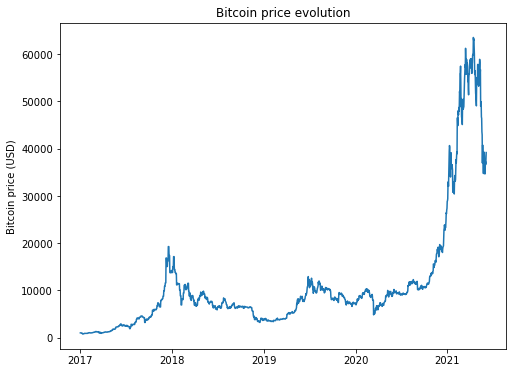

In [126]:
# Plotting the Bitcoin price between 2017 and 2021
date = final['market-price'].index
value = final['market-price']
fig, ax = plt.subplots(figsize=(8, 6))
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator) # Locator for major axis only.
ax.plot(date, value);
plt.ylabel('Bitcoin price (USD)')
plt.title('Bitcoin price evolution')
plt.savefig('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/Figuras/btc_price_years.jpg') # save this figure to use in the thesis
plt.show() # Plot the graph so we can see the results

*Both plots show us that the BTC is the most volatile asset, comparing to Gold and S&P500.*

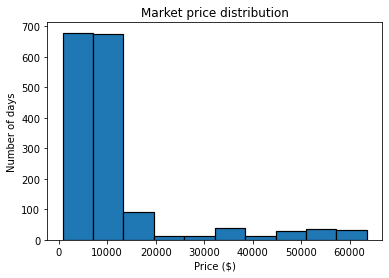

In [127]:
plt.hist(final['market-price'],edgecolor='black', linewidth=1.2)
plt.title('Market price distribution')
plt.ylabel('Number of days')
plt.xlabel('Price ($)')
plt.savefig('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/Figuras/hist_marketprice.jpg') # save this figure to use in the thesis
plt.show()

*As we can see, the BTC price is clearly skewed to the right. This means that we should apply log transformation to the variable.*

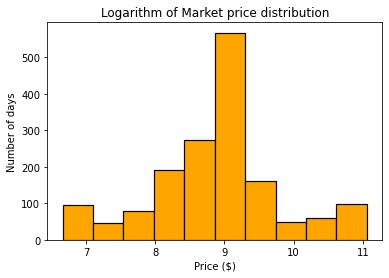

In [128]:
# Creating a new dataframe to model
model = pd.read_excel('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/data/final/final.xlsx',index_col=0)

# Applying log transformation into price-variables
model['market-price']=np.log(model['market-price'])
model['market-cap']=np.log(model['market-cap'])
model['High']=np.log(model['High'])
model['Low']=np.log(model['Low'])
model['Open']=np.log(model['Open'])
model['cost-per-transaction-percent']=np.log(model['cost-per-transaction-percent'])
model['fees-usd-per-transaction']=np.log(model['fees-usd-per-transaction'])
model['transaction-fees-usd']=np.log(model['transaction-fees-usd'])

# Rename the log variables
model = model.rename(columns={'market-price': 'lg_price'})
model = model.rename(columns={'market-cap': 'lg_market-cap'})
model = model.rename(columns={'High': 'lg_High'})
model = model.rename(columns={'cost-per-transaction-percent': 'lg_cost-per-transaction-percent'})
model = model.rename(columns={'Open': 'lg_Open'})
model = model.rename(columns={'Low': 'lg_Low'})
model = model.rename(columns={'fees-usd-per-transaction': 'lg_fees-usd-per-transaction'})
model = model.rename(columns={'transaction-fees-usd': 'lg_transaction-fees-usd'})

# Visualize the new transformation
plt.hist(model['lg_price'],edgecolor='black', linewidth=1.2, color='orange')
plt.title('Logarithm of Market price distribution')
plt.ylabel('Number of days')
plt.xlabel('Price ($)')
plt.savefig('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/Figuras/hist_logprice.jpg') # save this figure to use in the thesis
plt.show()

*Now we have a Normal Distribution as intended.*

*Next, we are going to investigate the same issue for some explanatory variables where we may need to apply the same solution.*

Text(0.5, 1.0, '16')

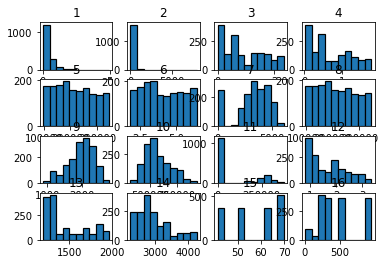

In [129]:
# Check the distributions and outliers of teh other variables
#Plot 1 - Trade Volume
plt.subplot(4,4,1)
plt.hist(model['trade-volume'],edgecolor='black', linewidth=1.2)
plt.title('1')

#Plot 2 - Average Confirmation Time
plt.subplot(4,4,2)
plt.hist(model['avg-confirmation-time'],edgecolor='black', linewidth=1.2)
plt.title('2')

#Plot 2 - difficulty
plt.subplot(4,4,3)
plt.hist(model['difficulty'],edgecolor='black', linewidth=1.2)
plt.title('3')

#Plot 4 - Hash rate
plt.subplot(4,4,4)
plt.hist(model['hash-rate'],edgecolor='black', linewidth=1.2)
plt.title('4')

#Plot 5 - block size
plt.subplot(4,4,5)
plt.hist(model['block-size'],edgecolor='black', linewidth=1.2)
plt.title('5')

#Plot 6 - total of transactions
plt.subplot(4,4,6)
plt.hist(model['n-transactions-total'],edgecolor='black', linewidth=1.2)
plt.title('6')

#Plot 7 - number of payments per block
plt.subplot(4,4,7)
plt.hist(model['n-payments-per-block'],edgecolor='black', linewidth=1.2)
plt.title('7')
          
#Plot 8 - block size
plt.subplot(4,4,8)
plt.hist(model['block-size'],edgecolor='black', linewidth=1.2)
plt.title('8')
          
#Plot 9 - Total of BTC circulating
plt.subplot(4,4,9)
plt.hist(model['Total-circulating-BTC'],edgecolor='black', linewidth=1.2)
plt.title('9')
          
#Plot 10 - number of unique addresses
plt.subplot(4,4,10)
plt.hist(model['n-unique-addresses'],edgecolor='black', linewidth=1.2)
plt.title('10')
          
#Plot 11 - number of transactions per block
plt.subplot(4,4,11)
plt.hist(model['n-transactions-per-block'],edgecolor='black', linewidth=1.2)
plt.title('11')
          
#Plot 12 - output volume
plt.subplot(4,4,12)
plt.hist(model['output-volume'],edgecolor='black', linewidth=1.2)
plt.title('12')
          
#Plot 13 - Gold
plt.subplot(4,4,13)
plt.hist(model['Gold'],edgecolor='black', linewidth=1.2)
plt.title('13')

#Plot 14 - S&P500
plt.subplot(4,4,14)
plt.hist(model['SP500'],edgecolor='black', linewidth=1.2)
plt.title('14')
          
#Plot 15 - Oil
plt.subplot(4,4,15)
plt.hist(model['Oil'],edgecolor='black', linewidth=1.2)
plt.title('15')
          
#Plot 16 - Theft
plt.subplot(4,4,16)
plt.hist(model['Theft'],edgecolor='black', linewidth=1.2)
plt.title('16')

*The plots number 1,2,3,4,9,10,12,13,14 are skewed. Thefore,it seems reasonable to use log transformation for all these plots.In the other situations, the log transformation does not make the desired improvements. Consequently, it will not be applied for those cases.*

In [130]:
# Log transformation
model['trade-volume']=np.log(model['trade-volume'])
model['avg-confirmation-time']=np.log(model['avg-confirmation-time'])
model['difficulty']=np.log(model['difficulty'])
model['hash-rate']=np.log(model['hash-rate'])
model['Total-circulating-BTC']=np.log(model['Total-circulating-BTC'])
model['n-unique-addresses']=np.log(model['n-unique-addresses'])
model['output-volume']=np.log(model['output-volume'])
model['Gold']=np.log(model['Gold'])
model['SP500']=np.log(model['SP500'])

# Rename the variables
model = model.rename(columns={'trade-volume': 'lg_trade-volume'})
model = model.rename(columns={'avg-confirmation-time': 'lg_avg-confirmation-time'})
model = model.rename(columns={'difficulty': 'lg_difficulty'})
model = model.rename(columns={'hash-rate': 'lg_hash-rate'})
model = model.rename(columns={'Total-circulating-BTC': 'lg_circulatingBTC'})
model = model.rename(columns={'n-unique-adresses': 'lg_n-unique-adresses'})
model = model.rename(columns={'trade-volume': 'lg_trade-volume'})
model = model.rename(columns={'output-volume': 'lg_output-volume'})
model = model.rename(columns={'Gold': 'lg_Gold'})
model = model.rename(columns={'SP500': 'lg_SP500'})

In [131]:
# Export the dataset to Excelthat will be used to modelling
model.to_excel('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/data/model/model.xlsx')

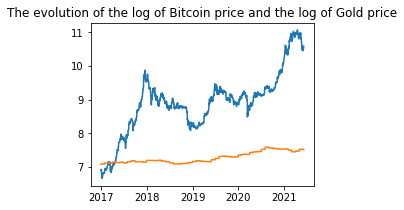

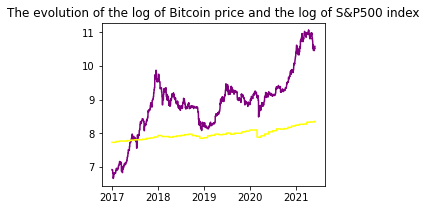

In [132]:
# Plotting the the log of Bitcoin price vs the log of Gold price between 2017 and 2021
date = model['lg_price'].index
value = model['lg_price']
value1 = model['lg_Gold']
value2 = model['lg_SP500']
fig, ax = plt.subplots(figsize=(4, 3))
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator) # Locator for major axis only.
ax.plot(date, value,value1);
plt.title('The evolution of the log of Bitcoin price and the log of Gold price')
plt.savefig('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/Figuras/BTCvsGold.jpg') # save this figure to use in the thesis

# Plotting the log of Bitcoin price vs the log of SP500 price between 2017 and 2021
fig, ax = plt.subplots(figsize=(4, 3))
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator) # Locator for major axis only.
ax.plot(date, value,color='purple')
ax.plot(date, value2,color='yellow')
plt.title('The evolution of the log of Bitcoin price and the log of S&P500 index')
plt.savefig('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/Figuras/BTCvsSP500.jpg') # save this figure to use in the thesis
plt.show() # Plot the graph so we can see the results

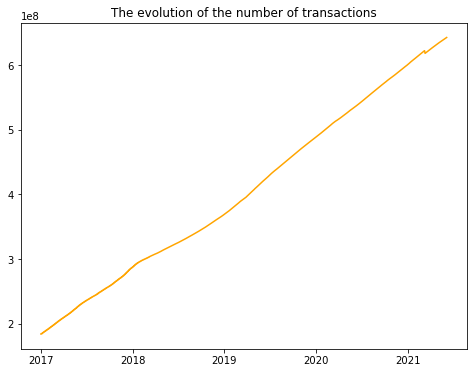

In [133]:
# PLot number of transactions of BTC over time
date = final['n-transactions-total'].index
value = final['n-transactions-total']
fig, ax = plt.subplots(figsize=(8, 6))
year_locator = mdates.YearLocator()
ax.xaxis.set_major_locator(year_locator) # Locator for major axis only.
ax.plot(date, value,color='orange');
plt.title('The evolution of the number of transactions')
plt.savefig('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/Figuras/n_transactions.jpg') # save this figure to use in the thesis
plt.show() # Plot the graph so we can see the results

*This plot shows that there is clearly a peak in 2020 on the number of BTC transactions and since then the variable is still decreasing.*

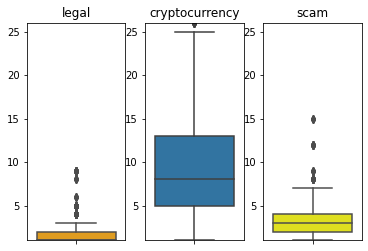

In [134]:
# Finding which keyword associated with Bitcoin that is more frequent in Google Trends
# Bitcoin+legal - POSITIVE SENTIMENT
plt.subplot(1,3,1)
sns.boxplot(y='GT_legal',data=model,color='orange')
plt.ylim(1, 26)
plt.ylabel('')
plt.title('legal')

# Bitcoin+cryptocurrency - NEUTRAL SENTIMENT
plt.subplot(1,3,2)
sns.boxplot(y='GT_cryptocurrency',data=model)
plt.ylim(1, 26)
plt.ylabel('')
plt.title('cryptocurrency')

# Bitcoin+scam - NEGATIVE SENTIMENT
plt.subplot(1,3,3)
sns.boxplot(y='GT_scam',data=model, color='yellow')
plt.ylim(1, 26)
plt.ylabel('')
plt.title('scam')

# Save this figure to use in the thesis
plt.savefig('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/Figuras/GT_boxplots.jpg') 

*It seems that, on average, the neutral sentiment regarding Bitcoin is the more usual, comparing to postive sentiment and negative sentiment expressed through Google searches.*

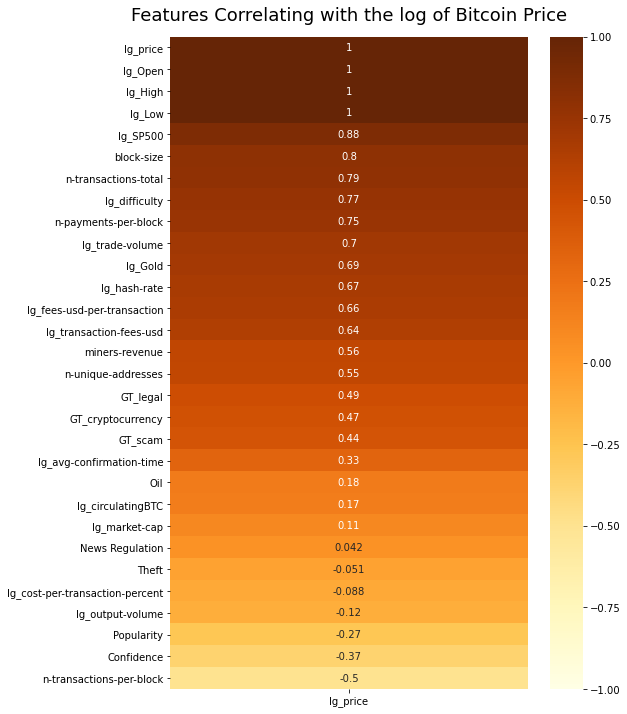

In [135]:
model.corr()[['lg_price']].sort_values(by='lg_price', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(model.corr()[['lg_price']].sort_values(by='lg_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap="YlOrBr")
heatmap.set_title('Features Correlating with the log of Bitcoin Price', fontdict={'fontsize':18}, pad=16);
# save this figure to use in the thesis
plt.savefig('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/Figuras/wr_corr_heatmap.png') 

*Most important conclusions obtained from this correlations heatmap:*

*1. The log of SP500 presents the highest correlation in the log of BTC price and it is not a transactions-based variable.*

*2. Although "legal" is not the most frequent Google Trend keyword, comparing to the other two, it is the most correlated one with BTC price. Note that this keyword represents a positive sentiment regarding Bitcoin.*

*3. An interesting fact is that when consumers' confidence index increases, which reflects a positive sentiment about the general economic situation, unemployment and capability of savings, the log of BTC price decreases. In this case, will they demand substitute assets of BTC?*

*4. There are transaction-based variables that are not highly correlated with the log of BTC price, as it had been expected, namely the log of market capitalisation.*

## 3. MODELLING

In [136]:
# Reading the model dataset
model = pd.read_excel('C:/Users/sofia/OneDrive/Desktop/CLSBE/2nd year/Tese/data/final/final.xlsx',index_col=0)